# Classifier fitting

This notebook will work on applying our previously defined neuron onto cat or dog finding.

**Main goals are**: 
 - See what are the problems remaining to implement it in concrete application


In [1]:
# !pip install h5py
import h5py 
from local_lib.dataset import *
X_train, y_train, X_test, y_test = load_data()

In [4]:
import numpy as np
np.shape(X_train)

(1000, 64, 64)

**To be able to use this data we will have to reshape it so it only contains 2 dimensions**

In [2]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train_reshaped.shape

(1000, 4096)

In [3]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test_reshaped.shape

(200, 4096)

In [4]:
X_train_reshaped_normalized = X_train_reshaped / 255

**Trying to train our neuron on it**

In [8]:
from local_lib.neuron import LinearNeuron

neuron = LinearNeuron(X_train_reshaped)

neuron.fit(X_train_reshaped, y_train)

c:\Users\chapu\Epitech\DEV810_Zoidberg\repo\IllnessRecognition\bootstrap\dl\local_lib\neuron.py:17: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
c:\Users\chapu\Epitech\DEV810_Zoidberg\repo\IllnessRecognition\bootstrap\dl\local_lib\neuron.py:13: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
c:\Users\chapu\Epitech\DEV810_Zoidberg\repo\IllnessRecognition\bootstrap\dl\local_lib\neuron.py:13: RuntimeWarning: invalid value encountered in multiply
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

Unable to compute exp because inputs becomes too high so it returns 1.0 and 0.0 and further we try to compute log loss by using this value in a log function.<br>
**Conclusion**: we need to adjust value before it is passed to log function, using a very small value, enough to avoid 1.0 and 0.0 values but not too high to not impact loss result

c:\Users\chapu\Epitech\DEV810_Zoidberg\repo\IllnessRecognition\bootstrap\dl\local_lib\neuron.py:18: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))


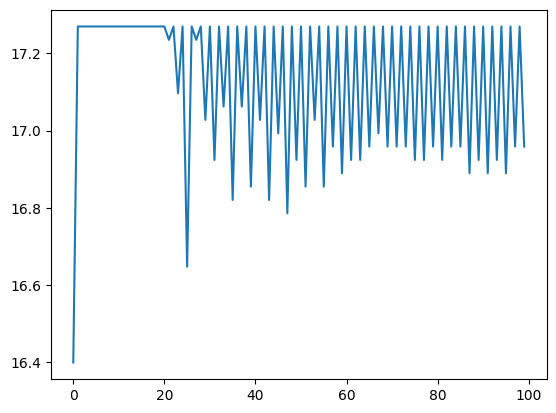

In [5]:
##Retrying fitting
from local_lib.neuron import LinearNeuron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

neuron = LinearNeuron(X_train_reshaped, lr=0.5)

loss = neuron.fit(X_train_reshaped, y_train)
plt.plot(loss)
plt.show()

Now it works thanks to our adjustements but still exp error and strange loss evolution<br>
**To correct exp error we need to normalize values**

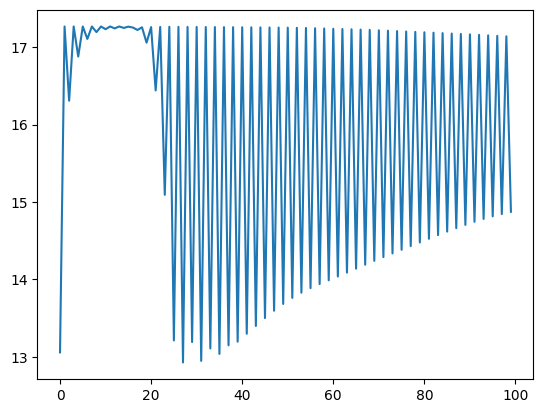

In [31]:
##Retrying fitting
from local_lib.neuron import LinearNeuron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train_reshaped_normalized = X_train_reshaped / 255

neuron = LinearNeuron(X_train_reshaped_normalized, lr=0.5)

loss = neuron.fit(X_train_reshaped_normalized, y_train)
plt.plot(loss)
plt.show()


Exponential problem solved but not loss curve
**This can be induced by huge scale gap between values (pixels)**<br>
Let's see that with a simple 2 parameters example

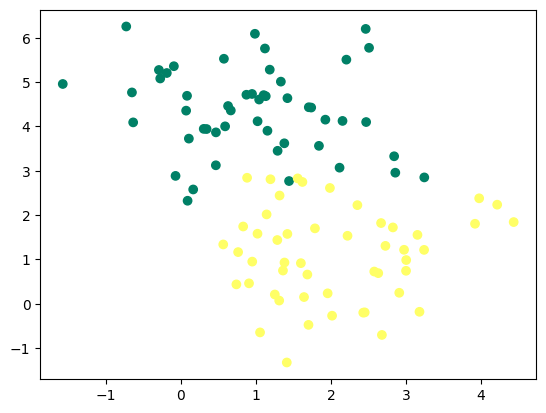

In [28]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:, 1] = X[:, 1] * 1

y = y.reshape(y.shape[0], 1)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [29]:
import numpy as np 

b = 0
#Generating sample values of w1 and w2
W1 = np.linspace(-10, 10, 100)
W2 = np.linspace(-10, 10, 100)

#Creating a map combining w1 and w2 values
W11, W22 = np.meshgrid(W1, W2)
W = np.c_[W11.ravel(), W22.ravel()].T

Z = X.dot(W) + b
A = 1 / (1 + np.exp(-Z))
epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(100,100)
L.shape


(100, 100)

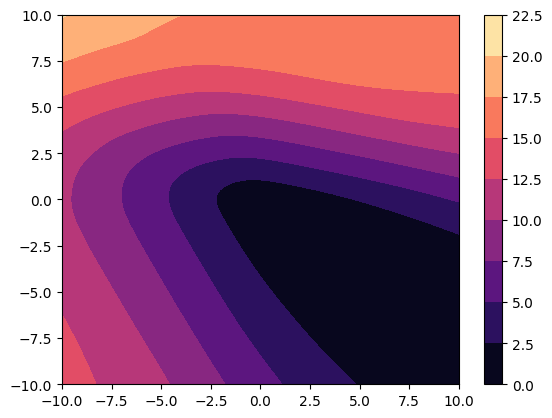

In [30]:
plt.contourf(W11, W22, L, cmap="magma")
plt.colorbar()

**We see that applying a 10 factor on x1 is completly modifying our loss evolution**

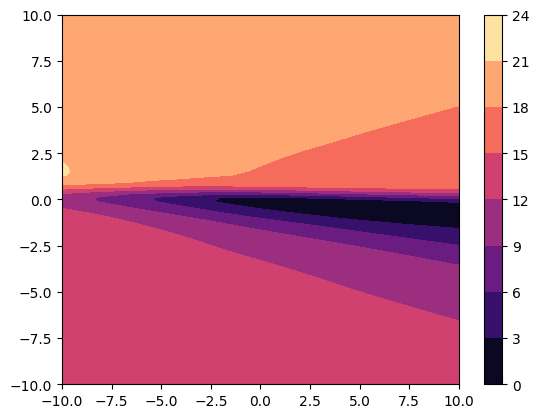

In [27]:
plt.contourf(W11, W22, L, cmap="magma")
plt.colorbar()

**Hopefully this is solved by previous normalization**

Let's try to optimize lr and n_iter

100%|██████████| 100/100 [00:00<00:00, 277.64it/s]


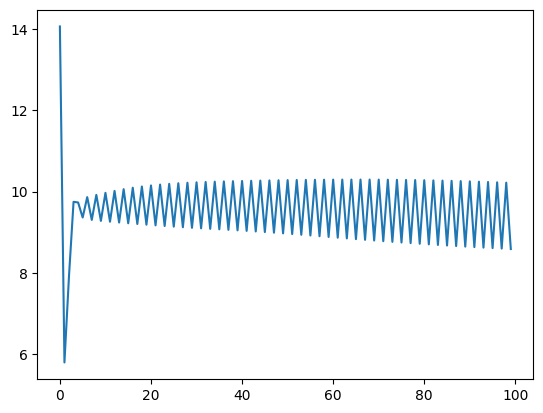

In [7]:
##Retrying fitting
from local_lib.neuron import LinearNeuron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

neuron = LinearNeuron(X_train_reshaped_normalized, lr=0.1)

loss = neuron.fit(X_train_reshaped_normalized, y_train)
plt.plot(loss)
plt.show()

100%|██████████| 100/100 [00:00<00:00, 330.54it/s]


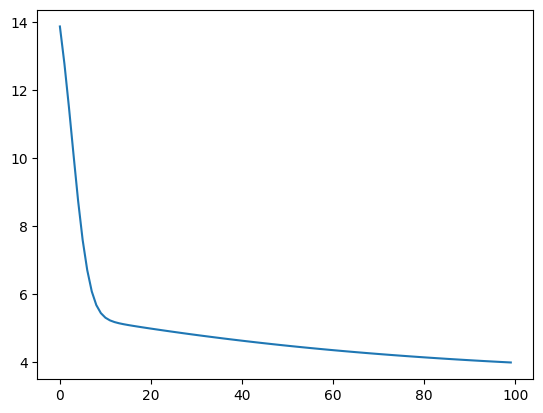

In [8]:
##Retrying fitting
from local_lib.neuron import LinearNeuron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

neuron = LinearNeuron(X_train_reshaped_normalized, lr=0.01)

loss = neuron.fit(X_train_reshaped_normalized, y_train)
plt.plot(loss)
plt.show()